## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3        X4         Y
0   1.964371  541.231283  0.005405  4.660231  0.967431
1  20.959915  692.338127  0.842587  5.737818  1.581828
2  24.753364  549.275210  0.429488  5.184025  1.499098
3  59.185724  662.249473  0.487011  6.285066  1.306002
4  21.106336  126.475250  0.991067  9.221625  1.465638


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0444305	total: 57.1ms	remaining: 57.1s
1:	learn: 1.0327736	total: 58.2ms	remaining: 29.1s
2:	learn: 1.0213261	total: 59.6ms	remaining: 19.8s
3:	learn: 1.0117607	total: 60.8ms	remaining: 15.1s
4:	learn: 1.0011041	total: 61.6ms	remaining: 12.3s
5:	learn: 0.9898057	total: 62.7ms	remaining: 10.4s
6:	learn: 0.9775311	total: 63.3ms	remaining: 8.98s
7:	learn: 0.9638153	total: 63.9ms	remaining: 7.92s
8:	learn: 0.9541222	total: 64.8ms	remaining: 7.14s
9:	learn: 0.9434441	total: 65.6ms	remaining: 6.5s
10:	learn: 0.9351003	total: 66.2ms	remaining: 5.95s
11:	learn: 0.9232866	total: 66.8ms	remaining: 5.5s
12:	learn: 0.9149091	total: 67.4ms	remaining: 5.12s
13:	learn: 0.9045966	total: 68ms	remaining: 4.79s
14:	learn: 0.8940701	total: 68.7ms	remaining: 4.51s
15:	learn: 0.8850982	total: 69.3ms	remaining: 4.26s


16:	learn: 0.8750681	total: 70.4ms	remaining: 4.07s
17:	learn: 0.8683976	total: 71.4ms	remaining: 3.89s
18:	learn: 0.8583059	total: 72.7ms	remaining: 3.75s
19:	learn: 0.8491389	total: 73.2ms	remaining: 3.59s
20:	learn: 0.8412714	total: 73.7ms	remaining: 3.44s
21:	learn: 0.8332409	total: 74.2ms	remaining: 3.3s
22:	learn: 0.8258354	total: 74.8ms	remaining: 3.18s
23:	learn: 0.8183286	total: 75.3ms	remaining: 3.06s
24:	learn: 0.8108276	total: 75.8ms	remaining: 2.95s
25:	learn: 0.8042950	total: 76.3ms	remaining: 2.86s
26:	learn: 0.7961126	total: 78.3ms	remaining: 2.82s
27:	learn: 0.7878116	total: 78.8ms	remaining: 2.74s
28:	learn: 0.7806276	total: 79.7ms	remaining: 2.67s
29:	learn: 0.7714423	total: 80.4ms	remaining: 2.6s
30:	learn: 0.7628803	total: 80.9ms	remaining: 2.53s
31:	learn: 0.7551039	total: 81.5ms	remaining: 2.47s
32:	learn: 0.7496182	total: 82.2ms	remaining: 2.41s
33:	learn: 0.7430062	total: 82.8ms	remaining: 2.35s
34:	learn: 0.7364428	total: 83.3ms	remaining: 2.3s
35:	learn: 0.73

203:	learn: 0.2468201	total: 168ms	remaining: 654ms
204:	learn: 0.2453846	total: 169ms	remaining: 654ms
205:	learn: 0.2440797	total: 169ms	remaining: 651ms
206:	learn: 0.2430474	total: 169ms	remaining: 649ms
207:	learn: 0.2423642	total: 170ms	remaining: 647ms
208:	learn: 0.2413397	total: 170ms	remaining: 645ms
209:	learn: 0.2402161	total: 171ms	remaining: 642ms
210:	learn: 0.2390449	total: 171ms	remaining: 640ms
211:	learn: 0.2376343	total: 172ms	remaining: 638ms
212:	learn: 0.2363099	total: 172ms	remaining: 636ms
213:	learn: 0.2349338	total: 173ms	remaining: 634ms
214:	learn: 0.2336983	total: 173ms	remaining: 632ms
215:	learn: 0.2327260	total: 174ms	remaining: 630ms
216:	learn: 0.2314537	total: 174ms	remaining: 628ms
217:	learn: 0.2302554	total: 175ms	remaining: 626ms
218:	learn: 0.2293233	total: 175ms	remaining: 624ms
219:	learn: 0.2276616	total: 175ms	remaining: 622ms
220:	learn: 0.2268419	total: 176ms	remaining: 620ms
221:	learn: 0.2257495	total: 176ms	remaining: 618ms
222:	learn: 

358:	learn: 0.1301806	total: 234ms	remaining: 418ms
359:	learn: 0.1296213	total: 235ms	remaining: 417ms
360:	learn: 0.1290882	total: 235ms	remaining: 416ms
361:	learn: 0.1286124	total: 236ms	remaining: 416ms
362:	learn: 0.1283581	total: 236ms	remaining: 415ms
363:	learn: 0.1278392	total: 237ms	remaining: 413ms
364:	learn: 0.1273327	total: 237ms	remaining: 412ms
365:	learn: 0.1268381	total: 237ms	remaining: 411ms
366:	learn: 0.1263552	total: 238ms	remaining: 410ms
367:	learn: 0.1260734	total: 238ms	remaining: 409ms
368:	learn: 0.1256020	total: 239ms	remaining: 408ms
369:	learn: 0.1251417	total: 239ms	remaining: 407ms
370:	learn: 0.1244804	total: 239ms	remaining: 406ms
371:	learn: 0.1241157	total: 240ms	remaining: 405ms
372:	learn: 0.1237840	total: 240ms	remaining: 404ms
373:	learn: 0.1234599	total: 241ms	remaining: 403ms
374:	learn: 0.1232185	total: 241ms	remaining: 402ms
375:	learn: 0.1229022	total: 241ms	remaining: 401ms
376:	learn: 0.1225931	total: 242ms	remaining: 400ms
377:	learn: 

582:	learn: 0.0641043	total: 330ms	remaining: 236ms
583:	learn: 0.0638010	total: 331ms	remaining: 236ms
584:	learn: 0.0635048	total: 331ms	remaining: 235ms
585:	learn: 0.0632653	total: 332ms	remaining: 234ms
586:	learn: 0.0632100	total: 332ms	remaining: 234ms
587:	learn: 0.0630428	total: 332ms	remaining: 233ms
588:	learn: 0.0628076	total: 333ms	remaining: 232ms
589:	learn: 0.0627539	total: 333ms	remaining: 232ms
590:	learn: 0.0624850	total: 334ms	remaining: 231ms
591:	learn: 0.0624323	total: 334ms	remaining: 230ms
592:	learn: 0.0622031	total: 334ms	remaining: 230ms
593:	learn: 0.0621516	total: 335ms	remaining: 229ms
594:	learn: 0.0621010	total: 335ms	remaining: 228ms
595:	learn: 0.0618758	total: 336ms	remaining: 228ms
596:	learn: 0.0618263	total: 336ms	remaining: 227ms
597:	learn: 0.0617777	total: 336ms	remaining: 226ms
598:	learn: 0.0616149	total: 337ms	remaining: 226ms
599:	learn: 0.0613235	total: 337ms	remaining: 225ms
600:	learn: 0.0611636	total: 338ms	remaining: 224ms
601:	learn: 

739:	learn: 0.0393319	total: 396ms	remaining: 139ms
740:	learn: 0.0392354	total: 397ms	remaining: 139ms
741:	learn: 0.0390496	total: 397ms	remaining: 138ms
742:	learn: 0.0389746	total: 398ms	remaining: 138ms
743:	learn: 0.0389007	total: 398ms	remaining: 137ms
744:	learn: 0.0387472	total: 399ms	remaining: 136ms
745:	learn: 0.0385859	total: 399ms	remaining: 136ms
746:	learn: 0.0384279	total: 399ms	remaining: 135ms
747:	learn: 0.0382251	total: 400ms	remaining: 135ms
748:	learn: 0.0380997	total: 400ms	remaining: 134ms
749:	learn: 0.0379678	total: 401ms	remaining: 134ms
750:	learn: 0.0378682	total: 401ms	remaining: 133ms
751:	learn: 0.0377578	total: 401ms	remaining: 132ms
752:	learn: 0.0376597	total: 402ms	remaining: 132ms
753:	learn: 0.0375417	total: 402ms	remaining: 131ms
754:	learn: 0.0373941	total: 403ms	remaining: 131ms
755:	learn: 0.0372798	total: 403ms	remaining: 130ms
756:	learn: 0.0371676	total: 403ms	remaining: 129ms
757:	learn: 0.0370269	total: 404ms	remaining: 129ms
758:	learn: 

974:	learn: 0.0210062	total: 491ms	remaining: 12.6ms
975:	learn: 0.0209581	total: 492ms	remaining: 12.1ms
976:	learn: 0.0208922	total: 492ms	remaining: 11.6ms
977:	learn: 0.0208048	total: 493ms	remaining: 11.1ms
978:	learn: 0.0207918	total: 493ms	remaining: 10.6ms
979:	learn: 0.0207256	total: 494ms	remaining: 10.1ms
980:	learn: 0.0206801	total: 494ms	remaining: 9.57ms
981:	learn: 0.0206211	total: 495ms	remaining: 9.06ms
982:	learn: 0.0206085	total: 495ms	remaining: 8.56ms
983:	learn: 0.0205564	total: 495ms	remaining: 8.05ms
984:	learn: 0.0204845	total: 496ms	remaining: 7.55ms
985:	learn: 0.0204144	total: 496ms	remaining: 7.04ms
986:	learn: 0.0203461	total: 497ms	remaining: 6.54ms
987:	learn: 0.0202690	total: 497ms	remaining: 6.04ms
988:	learn: 0.0202300	total: 498ms	remaining: 5.53ms
989:	learn: 0.0201915	total: 498ms	remaining: 5.03ms
990:	learn: 0.0201168	total: 499ms	remaining: 4.53ms
991:	learn: 0.0200787	total: 499ms	remaining: 4.02ms
992:	learn: 0.0199948	total: 499ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4043334759221451


ABC Pre-generator MAE 1.2330834938559243


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

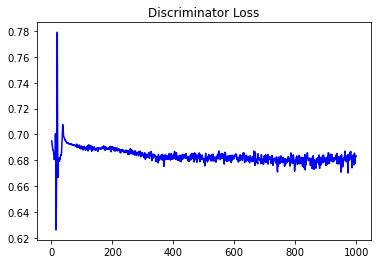

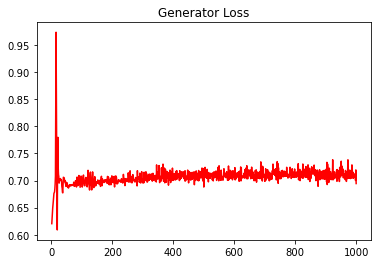

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.5643605021302938


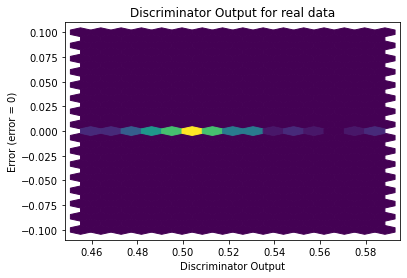

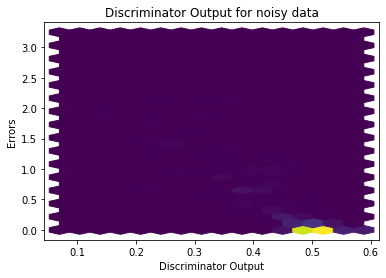

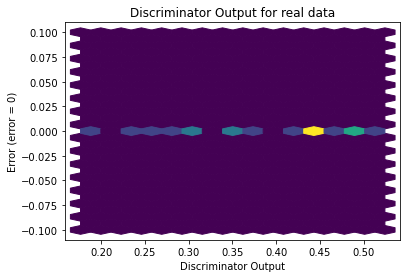

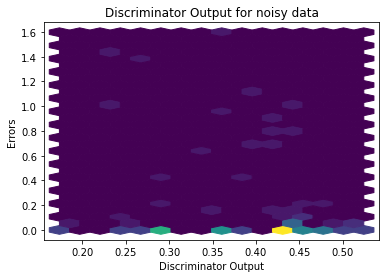

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

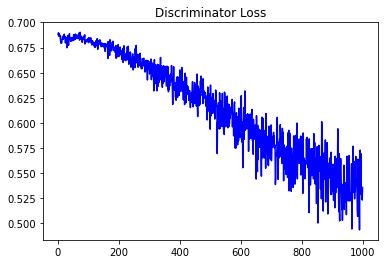

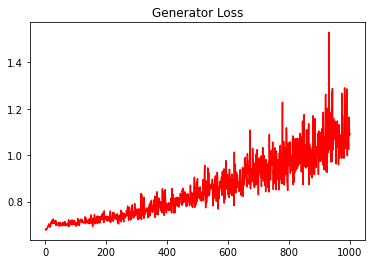

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4743604503692477


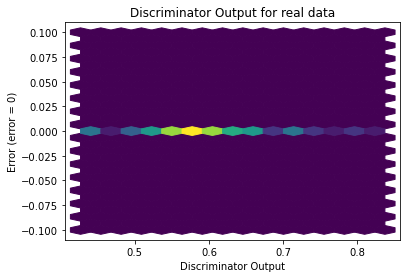

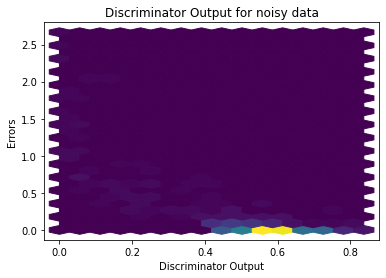

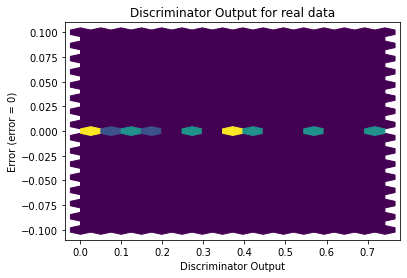

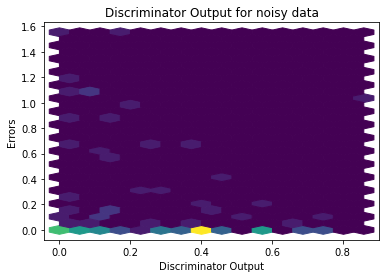

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


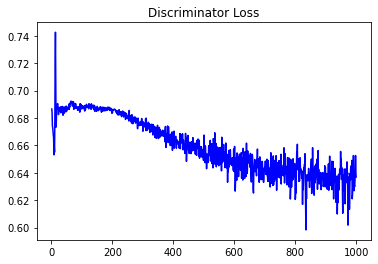

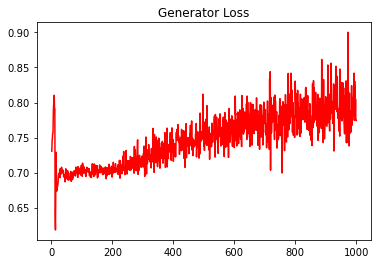

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4708429743378656


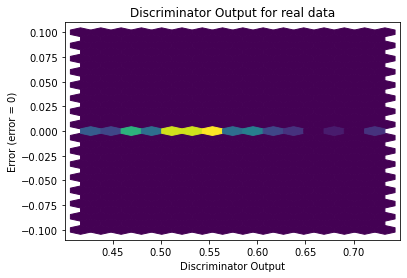

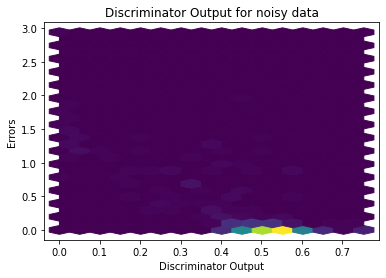

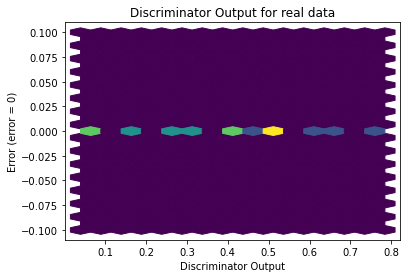

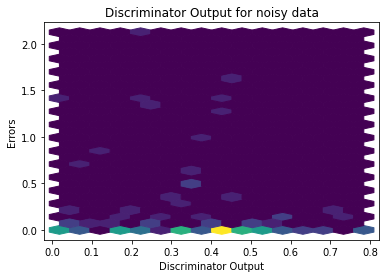

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


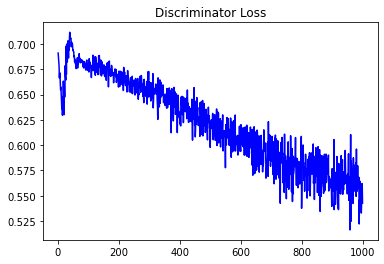

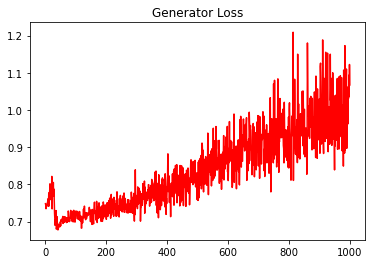

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4876641846697894


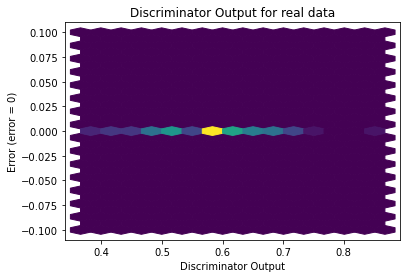

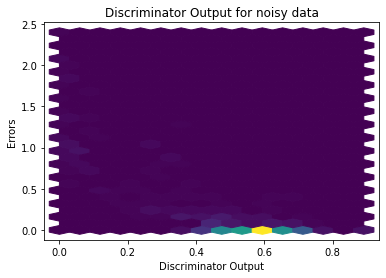

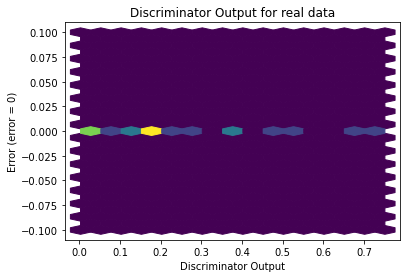

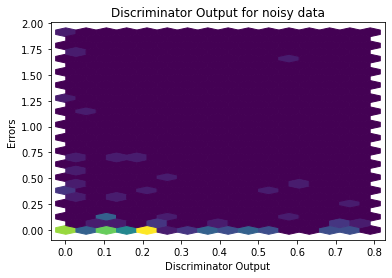

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1191]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6559]], requires_grad=True)
